# Loan Approval Prediction

Problem:
    Automate the loan eligibility process (in real time) based on customer detail provided while
    filling in the application form.

This is a classification problem where we have to predict whether a loan will be approved or not. Specifically, it is a binary classification problem where we have to predict either one of the two classes given i.e. approved (Y) or not approved (N). Another way to frame the problem is to predict whether the loan will likely to default or not, if it is likely to default, then the loan would not be approved, and vice versa. The dependent variable or target variable is the Loan_Status, while the rest are independent variable or features. We need to develop a model using the features to predict the target variable.

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
#import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Test Dataset into Dataframe using Pandas
sample_data = pd.read_csv('trial.csv')

In [3]:
#Dividing Variable into categorical and numerical
category_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print('CATEGORICAL COLUMNS:', category_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print('NUMERICAL COLUMNS:', numerical_columns)

CATEGORICAL COLUMNS: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
NUMERICAL COLUMNS: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [4]:
#Number of missing data in dataset
sample_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Missing values table
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(sample_data).head(50)    

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


In [7]:
#Summary of numerical variable
sample_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Visualizing Data
Using bargraphs and boxplot to visualize data

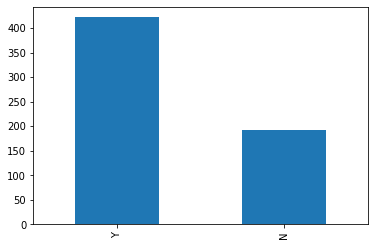

In [8]:
#Percentage distribution of Approval
#Calculated by setting the normalize=True to show proportions instead of number 
sample_data['Loan_Status'].value_counts(normalize=True)
#Bar graph to visualize the frequency
sample_data['Loan_Status'].value_counts().plot.bar()

# Univariate Analysis

Univariate analysis is when we analyze each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable. With a histogram, you can check the central tendency, variability, modality, and kurtosis of a distribution. Note that a histogram can’t show you if you have any outliers. This is why we also use box-plots.

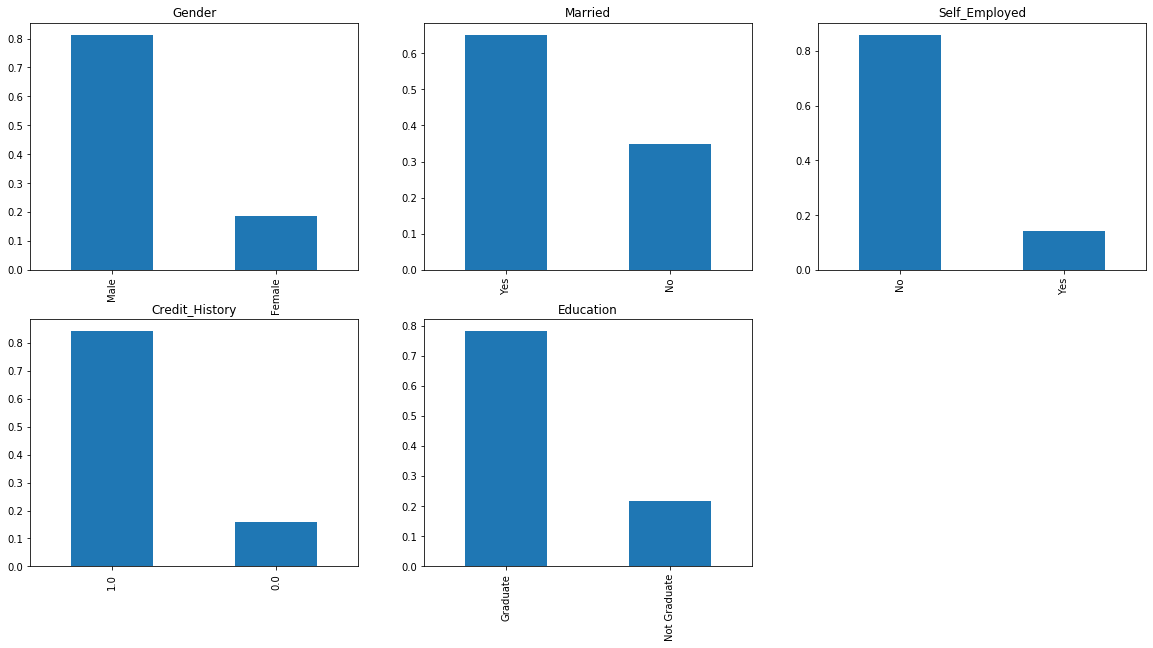

In [9]:
# Visualizing categorical features 
# plt.figure(1)
plt.subplot(231)
sample_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
sample_data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
sample_data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
sample_data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
sample_data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

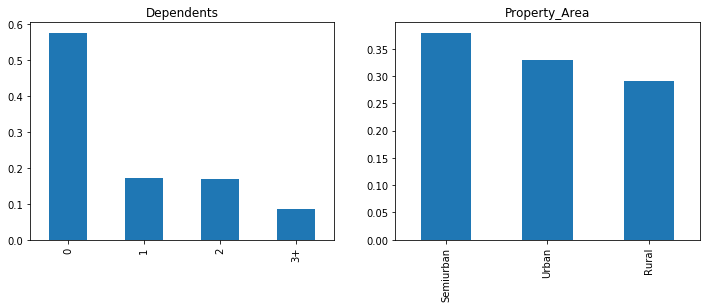

In [10]:
# Visualizing ordinal categorical features
# plt.figure(1)
plt.subplot(121)
sample_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
sample_data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

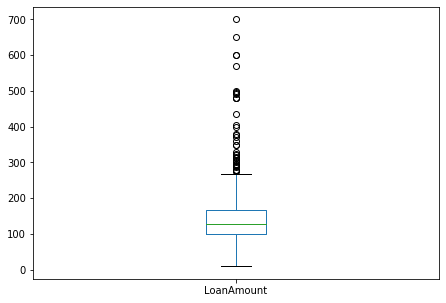

In [11]:
# Visualizing Numerical Features
plt.subplot(122)
sample_data['LoanAmount'].plot.box(figsize=(16,5))


plt.show()


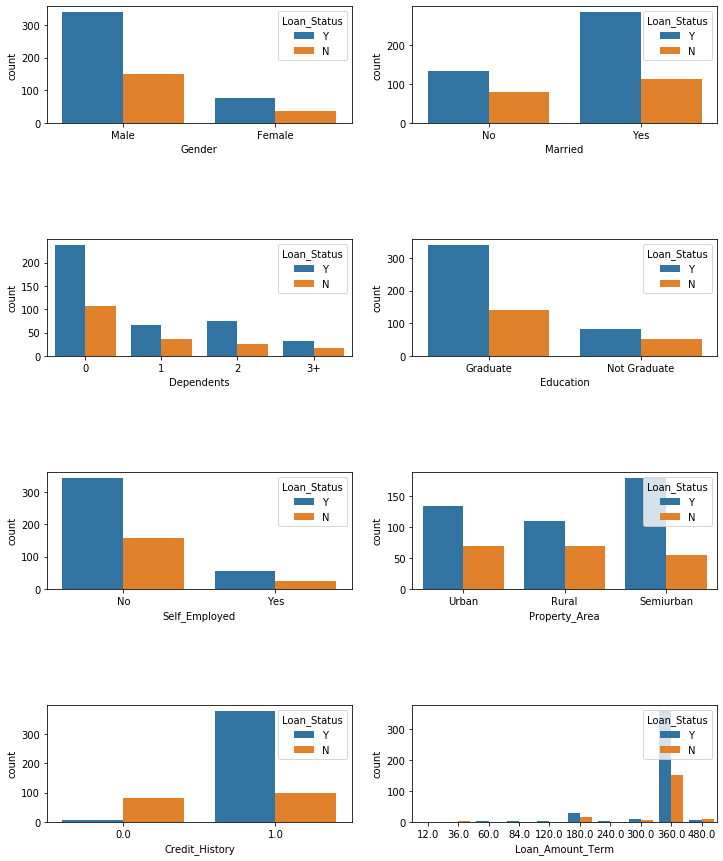

In [12]:
#Plotting bargraphs for categorical variables and their approval
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(category_columns):#printing categories in x axis
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=sample_data,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

### Inference from Bargraphs
* proportion of male and female applicants is more or less same for both approved and unapproved loans
* proportion of married applicants is higher for the approved loan
* distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
* there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
* proportion of loans getting approved for graduates is higher compared to non-graduates
* it seems people with credit history as 1 are more likely to get their loans approved
* proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


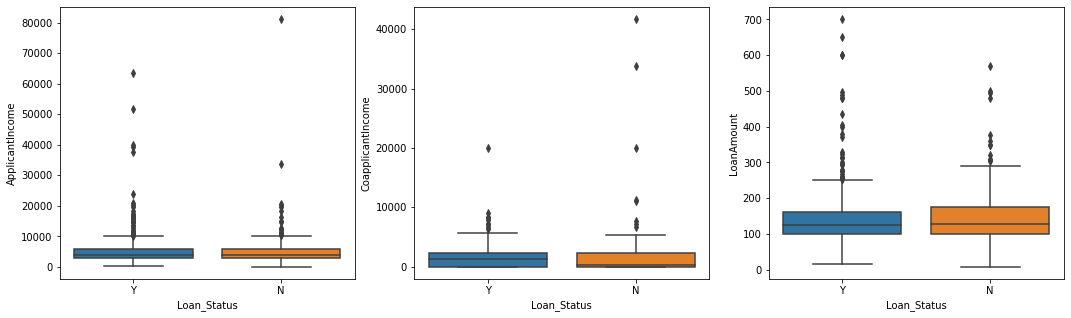

In [13]:
#Plotting boxplots for numerical variables to visualize the range of data
fig,axes = plt.subplots(1,3,figsize=(18,5)) 
for idx,cat_col in enumerate(numerical_columns):#label for graph
    sns.boxplot(y=cat_col,data=sample_data,x='Loan_Status',ax=axes[idx])

print(sample_data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

# Bivariate analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


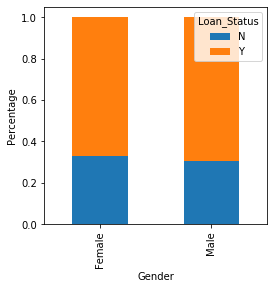

In [14]:
print(pd.crosstab(sample_data['Gender'],sample_data['Loan_Status']))

Gender = pd.crosstab(sample_data['Gender'],sample_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


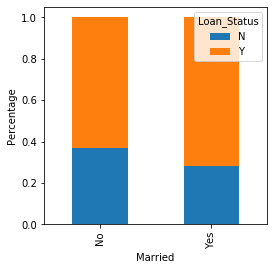

In [15]:
print(pd.crosstab(sample_data['Married'],sample_data['Loan_Status']))

Married = pd.crosstab(sample_data['Married'],sample_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


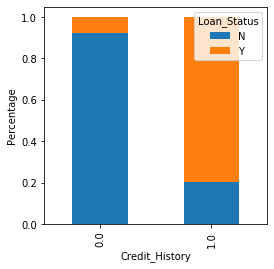

In [16]:
print(pd.crosstab(sample_data['Credit_History'],sample_data['Loan_Status']))

Credit_History=pd.crosstab(sample_data['Credit_History'],sample_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


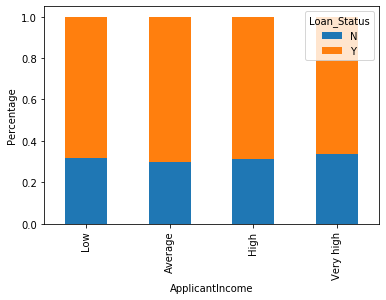

In [17]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
sample_data['Income_bin'] = pd.cut(sample_data['ApplicantIncome'],bins,labels=group)

print(pd.crosstab(sample_data['Income_bin'],sample_data['Loan_Status']))

Income_bin = pd.crosstab(sample_data['Income_bin'],sample_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

# Correlation Analysis
Understanding the relationship between different features of dataset 

In [18]:
correlation = sample_data.corr()

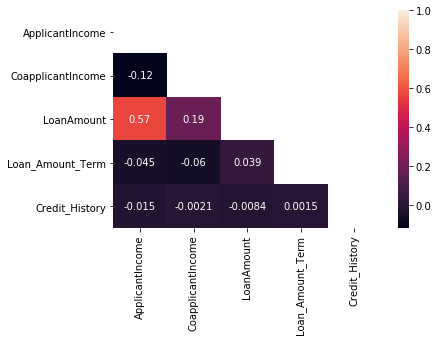

In [19]:
#Plotting heatmap for the various variables
mask = np.zeros_like(correlation, dtype=np.bool) #Hiding top half as values repeat
mask[np.triu_indices_from(mask)]= True

sns.heatmap(correlation,mask=mask, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)


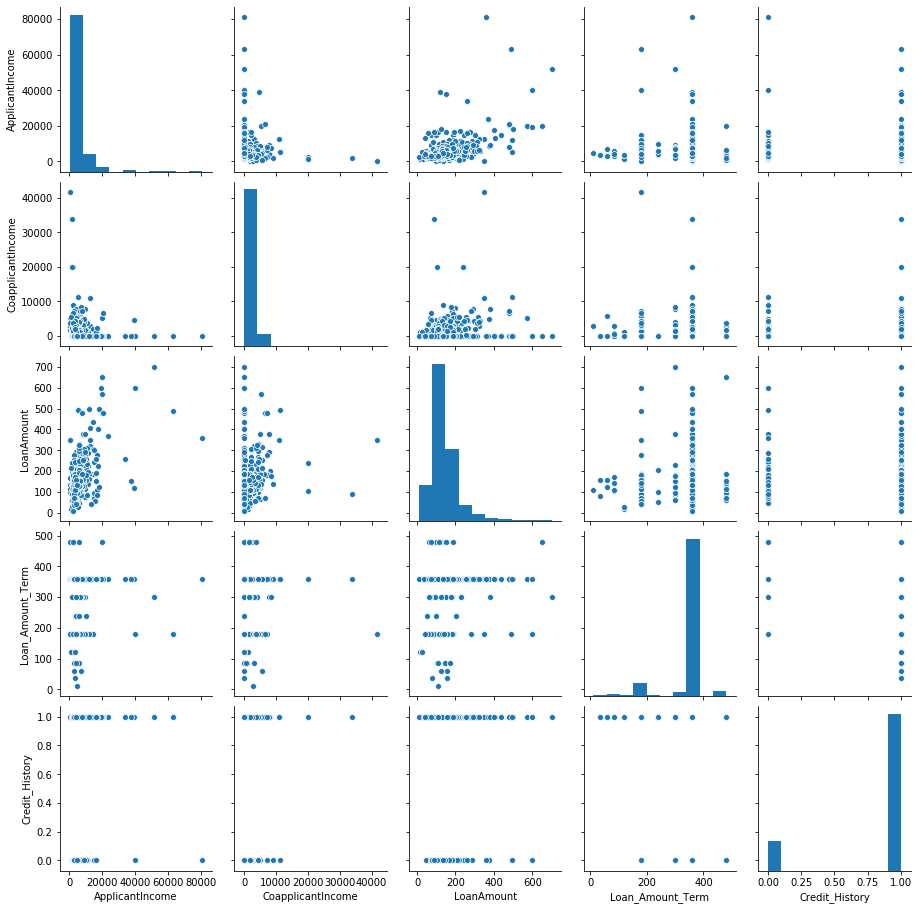

In [20]:
#Plotting pairplots to visualize the correlation
sns.pairplot(sample_data)

Text(0.5, 0.98, '')

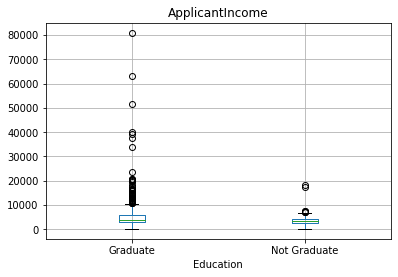

In [21]:
# Income disparity could be due to applicants with different Education Levels 
# Box plot for segrating based on education level
sample_data.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

From above graph it is clear that there is no clear difference between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which appear to be outliers .

# Cleaning Data

Filling in the missing or blank values in dataset

In [22]:
#Inputing Missing values with mean for continuous variable
sample_data['LoanAmount'].fillna(sample_data['LoanAmount'].mean(), inplace=True)
sample_data['Loan_Amount_Term'].fillna(sample_data['Loan_Amount_Term'].mean(), inplace=True)
sample_data['ApplicantIncome'].fillna(sample_data['ApplicantIncome'].mean(), inplace=True)
sample_data['CoapplicantIncome'].fillna(sample_data['CoapplicantIncome'].mean(), inplace=True)

#Inputing Missing values with mode for categorical variables
sample_data['Gender'].fillna(sample_data['Gender'].mode()[0], inplace=True)
sample_data['Married'].fillna(sample_data['Married'].mode()[0], inplace=True)
sample_data['Self_Employed'].fillna(sample_data['Self_Employed'].mode()[0], inplace=True)
sample_data['Dependents'].fillna(sample_data['Dependents'].mode()[0], inplace=True)
sample_data['Loan_Amount_Term'].fillna(sample_data['Loan_Amount_Term'].mode()[0], inplace=True)
sample_data['Credit_History'].fillna(sample_data['Credit_History'].mode()[0], inplace=True)

In [23]:
#Number of missing data in dataset
sample_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
dtype: int64

In [24]:
sample_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,Very high
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,Very high


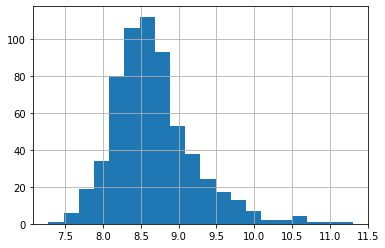

In [25]:
#Reducing the outlier in Incomes by adding Applicant and Coapplicant and using log values for documentation 
sample_data['TotalIncome'] = sample_data['ApplicantIncome'] + sample_data['CoapplicantIncome']
sample_data['TotalIncome_log'] = np.log(sample_data['TotalIncome'])
sample_data['TotalIncome_log'].hist(bins=20)

In [26]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
sample_data['Total_Income_bin'] = pd.cut(sample_data['TotalIncome'],bins,labels=group)

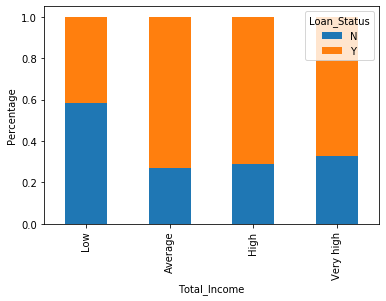

In [27]:
Total_Income_bin = pd.crosstab(sample_data['Total_Income_bin'],sample_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [28]:
sample_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.372489,0.352339,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000,11.302204


In [29]:
#Dropping the variables combined
sample_data = sample_data.drop(['Income_bin', 'TotalIncome', 'Total_Income_bin', 'TotalIncome_log'], axis=1)


In [30]:
#Replacing 3+ in Dependents variable with 3 for test set
sample_data['Dependents'].replace('3+', 3, inplace=True)

In [31]:
#Replacing Y and N in Loan_Status variable with 1 and 0 respectively
sample_data['Loan_Status'].replace('N', 0, inplace=True)
sample_data['Loan_Status'].replace('Y', 1, inplace=True)

# Model Building

In [32]:
# drop "Loan_Status" and assign it to target variable
X = sample_data.drop('Loan_Status', axis =1)
y = sample_data.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.
As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [33]:
X = pd.get_dummies(X)
sample_data = pd.get_dummies(sample_data)

In [34]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [36]:
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

#stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
predictions = model.predict(X_test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.8032786885245902

Mean validation accuracy:  0.8094362255097961


In [37]:
print(metrics.classification_report(y_test,predictions ))

              precision    recall  f1-score   support

           0       0.81      0.46      0.59        65
           1       0.79      0.95      0.86       138

    accuracy                           0.79       203
   macro avg       0.80      0.71      0.73       203
weighted avg       0.80      0.79      0.77       203



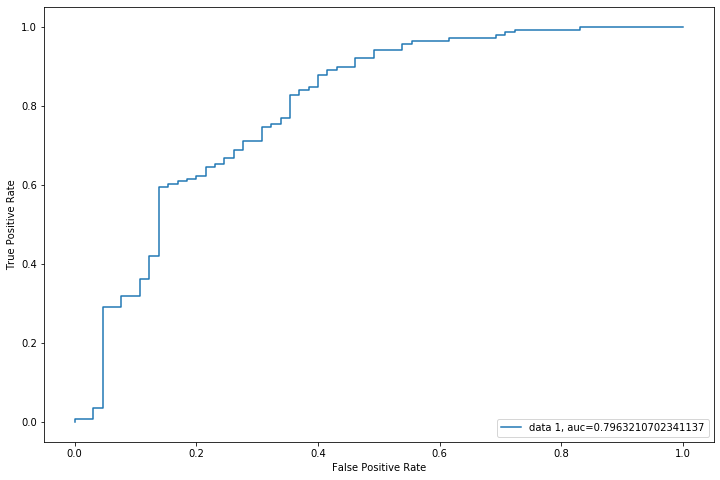

In [38]:
# visualize ROC curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [39]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1], dtype=int64)

In [40]:
y_pred_proba

array([0.82967854, 0.81573583, 0.71753298, 0.92389417, 0.82152797,
       0.66887443, 0.66801846, 0.71586419, 0.9244339 , 0.92221276,
       0.82791473, 0.63335091, 0.52559903, 0.66740715, 0.04468376,
       0.58829049, 0.95733023, 0.65390476, 0.93609674, 0.05535333,
       0.95678814, 0.62333864, 0.66006679, 0.88377398, 0.66416113,
       0.9688341 , 0.69168503, 0.36784693, 0.05824752, 0.8114301 ,
       0.09870588, 0.71760263, 0.68078808, 0.90633698, 0.82908733,
       0.80512327, 0.54993207, 0.78352667, 0.86465378, 0.84617488,
       0.90823619, 0.89086087, 0.20293305, 0.87946996, 0.71506193,
       0.07474814, 0.90945093, 0.89259262, 0.8762591 , 0.729255  ,
       0.26490564, 0.87346237, 0.74015836, 0.77594322, 0.7684137 ,
       0.6368617 , 0.71514936, 0.71683385, 0.95362154, 0.74502402,
       0.91188986, 0.79712969, 0.90858655, 0.70639353, 0.8794474 ,
       0.91739069, 0.7945739 , 0.07828589, 0.86991487, 0.3604572 ,
       0.13731058, 0.13443613, 0.78972447, 0.93326986, 0.69298